In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
df_classification = pd.read_csv("classification.txt", header = None)

In [3]:
df_classification.head()

,0,1,2,3,4
0,0.750072,0.977408,0.885658,-1,1
1,0.877914,0.019251,0.506711,1,-1
2,0.777325,0.994066,0.822244,-1,1
3,0.181158,0.460749,0.525477,-1,1
4,0.114564,0.067555,0.128920,-1,1


In [4]:
first_4 = df_classification.drop(columns = [4])
first_4.head()

,0,1,2,3
0,0.750072,0.977408,0.885658,-1
1,0.877914,0.019251,0.506711,1
2,0.777325,0.994066,0.822244,-1
3,0.181158,0.460749,0.525477,-1
4,0.114564,0.067555,0.128920,-1


In [5]:
last_col = df_classification.drop(columns = [3])
last_col.head()

,0,1,2,4
0,0.750072,0.977408,0.885658,1
1,0.877914,0.019251,0.506711,-1
2,0.777325,0.994066,0.822244,1
3,0.181158,0.460749,0.525477,1
4,0.114564,0.067555,0.128920,1


In [6]:
x_perceptron = np.array(first_4.drop(columns = [3]))
y_perceptron = np.array(first_4[3])

In [7]:
x_pocket = np.array(last_col.drop(columns = [4]))
y_pocket = np.array(last_col[4])

## PERCEPTRON LEARNING ALGORITHM

In [8]:
x_percep_train, x_percep_test, y_percep_train, y_percep_test = train_test_split(x_perceptron, y_perceptron, test_size = 0.2, random_state = 42)

In [9]:
class Perceptron:
    def __init__(self):
        self.W = None
        self.b = None
    
    def predict_single(self, x):
        if np.dot(self.W, x) + self.b >= 0:
            return 1
        else:
            return -1
    
    def predict(self, X):
        preds = np.dot(X, self.W) + self.b
        for idx, item in enumerate(preds):
            if item < 0:
                preds[idx] = -1
            else:
                preds[idx] = 1
        return preds
    
    def fit(self, X, y, epochs = 100, lr = 0.1):
        self.W = np.random.uniform(low = -1, high = 1, size = X.shape[1])
        self.b = np.random.uniform(-1, 1)
        accuracy = []
        best_W = None
        best_b = None
        max_accuracy = 0
        for i in range(epochs):
            for x, y_targ in zip(X, y):
                y_pred = self.predict_single(x)
                if y_targ == 1 and y_pred == -1:
                    self.W = self.W + lr * x
                    self.b = self.b + lr
                elif y_targ == -1 and y_pred == 1:
                    self.W = self.W - lr * x
                    self.b = self.b - lr
            acc = accuracy_score(y, self.predict(X))
            accuracy.append(acc)
            if acc > max_accuracy:
                best_W = self.W
                best_b = self.b
                max_accuracy = acc
#             if acc >= 0.999:
#                 break
        
        self.W = best_W
        self.b = best_b
        return self.W, self.b, accuracy, max_accuracy

In [10]:
perceptron = Perceptron()
weights, bias, accuracy, max_accuracy = perceptron.fit(x_percep_train, y_percep_train, 1000, 0.03)
print("Weights: ", weights)
print("Bias: ", bias)
print("Accuracy: ", max_accuracy)

Weights:  [ 1.54501924 -1.23736401 -0.91809144]
Bias:  -0.007045563364800805
Accuracy:  1.0


In [11]:
epochs = [i for i in range(len(accuracy))]

Text(0, 0.5, 'Accuracy')

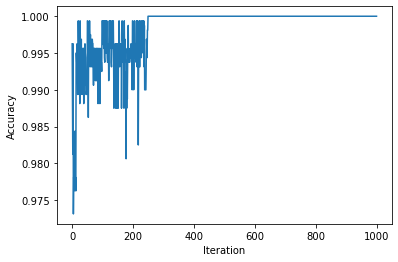

In [12]:
plt.plot(epochs, accuracy, '-')
plt.xlabel("Iteration")
plt.ylabel("Accuracy")

In [13]:
test_preds = perceptron.predict(x_percep_test)

In [14]:
print("Test Accuracy: ", accuracy_score(y_percep_test, test_preds))

Test Accuracy:  0.995


## POCKET ALGORITHM

In [33]:
def pocket(X, y, epochs, lr):
    misclassifications = []
    min_misclass = np.inf
    weights = np.random.uniform(X.shape[1], size = X.shape[1])
    best_weights = weights
    max_accuracy = 0
    while(epochs > 0):
        misses = 0
        for i in range(len(X)):
            x = X[i]
            y_targ = y[i]
            y_pred = np.dot(weights, x)
            if y_pred < 0 and y_targ == 1:
                misses += 1
                weights = weights + lr * x
            elif y_pred >=0 and y_targ == -1:
                misses += 1
                weights = weights - lr * x
        misclassifications.append(misses)
        if misses < min_misclass:
            best_weights = weights
            min_misclass = misses
            max_accuracy = (len(X) - misses) / len(X)
        epochs -= 1
    return weights, misclassifications, max_accuracy
                

In [16]:
weights, misclasses, accuracy = pocket(x_pocket, y_pocket, 7000, 0.03)

Weights:  [ 0.0028407   0.03197547 -0.0051001 ]
Max Accuracy:  0.534


Text(0, 0.5, 'Misclassifications')

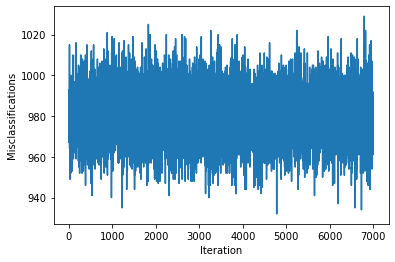

In [17]:
print("Weights: ", weights)
print("Max Accuracy: ", accuracy)
epochs = [i for i in range(1, 7001)]
plt.plot(epochs, misclasses)
plt.xlabel("Iteration")
plt.ylabel("Misclassifications")

## LOGISTIC REGRESSION

In [18]:
class Logistic:
    
    def __init__(self):
        self.W = None
        self.b = None
    
    def sigmoid(self, x):
        return np.exp(x) / (1 + np.exp(x))

    def predict(self, X):
        return self.sigmoid(np.dot(X, self.W) + self.b)
    
    def accuracy(self, y_hat, y):
        preds = y_hat >= 0.5
        return accuracy_score(y, preds)
    
    def fit(self, X, y, lr, epochs):
        self.W = np.random.uniform(-1, 1, size = X.shape[1])
        self.b = np.random.uniform(-1, 1)
        best_W = self.W
        best_b = self.b
        max_acc = 0
        n = X.shape[0]
        loss = []        
        for i in range(epochs):
            y_hat = self.predict(X)
            acc = self.accuracy(y_hat, y)
            if acc > max_acc:
                max_acc = acc
                best_W = self.W
                best_b = self.b
            loss.append(-np.mean(y * (np.log(y_hat)) - (1 - y) * np.log(1 - y_hat)))
            dW = (1 / n) * (np.dot(X.T, (y_hat - y)))
            db = (1 / n) * np.sum(y_hat - y)
            self.W = self.W - lr * dW
            self.b = self.b - lr * db
            
        self.W = best_W
        self.b = best_b
        
        return self.W, self.b, loss, max_acc
    

In [19]:
x_logistic = x_pocket
y_logistic = y_pocket

In [20]:
y_logistic = np.array([1 if x == 1 else 0 for x in y_logistic])

In [21]:
x_logistic_train, x_logistic_test, y_logistic_train, y_logistic_test = train_test_split(x_logistic, y_logistic, test_size = 0.2, random_state = 42)

In [22]:
logistic = Logistic()
weights, bias, loss, acc = logistic.fit(x_logistic_train, y_logistic_train, 0.03, 7000)
test_acc = logistic.accuracy(logistic.predict(x_logistic_test), y_logistic_test)

In [23]:
print("Weights: ", weights)
print("Bias: ", bias)
print("Train Accuracy: ", acc)
print("Test Accuracy: ", test_acc)

Weights:  [-0.17342674  0.14037464  0.16766943]
Bias:  -0.09250399492840805
Train Accuracy:  0.52125
Test Accuracy:  0.505


Text(0.5, 1.0, 'Iteration vs. Loss Plot')

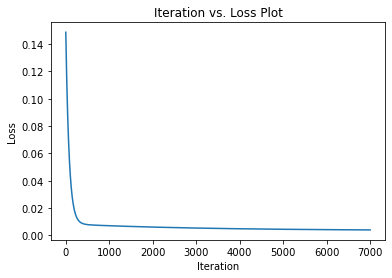

In [24]:
epochs = [i for i in range(1, 7001)]
plt.plot(epochs, loss, '-')
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.title("Iteration vs. Loss Plot")

## LINEAR REGRESSION

In [25]:
df_regression = pd.read_csv("linear-regression.txt", header = None)

In [26]:
df_regression.head()

,0,1,2
0,0.693781,0.697544,3.252290
1,0.693737,0.575576,2.898651
2,0.000576,0.458192,1.986979
3,0.194953,0.470199,2.272075
4,0.031775,0.026546,0.231178


In [27]:
reg_X = df_regression.drop(columns = [2])
reg_y = df_regression[2]

In [28]:
reg_X_train, reg_X_test, reg_y_train, reg_y_test = train_test_split(reg_X, reg_y, test_size = 0.2, random_state = 42)

In [29]:
class LinearRegression:
    
    def __init__(self):
        self.W = None
        self.b = None
        
    def cost(self, X, y):
        return np.sum((((np.dot(X, self.W) + self.b) - y) ** 2) / (2 * len(y)))
    
    def predict(self, X):
        return np.dot(X, self.W) + self.b
    
    def fit(self, X, y, lr, epochs):
        costs = []
        min_cost = np.inf
        self.W = np.random.uniform(-1, 1, size = X.shape[1])
        self.b = np.random.uniform(-1, 1)
        best_W = self.W
        best_b = self.b
        best_r2 = None
        
        for i in range(epochs):
            y_pred = self.predict(X)
            loss = y_pred - y
            curr_cost = self.cost(X, y)
            costs.append(curr_cost)
            if curr_cost < min_cost:
                min_loss = loss
                best_W = self.W
                best_b = self.b
                best_r2 = self.r2_Score(y, y_pred)

            dW = np.dot(X.T, loss) / len(y)
            db = np.sum(loss) / len(y)
            self.W = self.W - lr * dW
            self.b = self.b - lr * db
        
        self.W = best_W
        self.b = best_b
        return self.W, self.b, costs, best_r2
        
    def r2_Score(self, y_targ, y_pred):
        rss = np.sum((y_targ - y_pred) ** 2)
        tss = np.sum((y_targ - y_targ.mean()) ** 2)
        
        return 1 - (rss / tss)
            

In [30]:
linear_reg = LinearRegression()
weights, bias, costs, r2 = linear_reg.fit(reg_X_train, reg_y_train, 0.03, 7000)
test_r2 = linear_reg.r2_Score(reg_y_test, linear_reg.predict(reg_X_test))

In [31]:
print("Weights: ", weights)
print("Bias: ", bias)
print("Train R2 Score: ", r2)
print("Test R2 Score: ", test_r2)

Weights:  [1.08756392 3.97893168]
Bias:  0.020247016405602378
Train R2 Score:  0.9719021056868362
Test R2 Score:  0.9735255728080507


Text(0.5, 1.0, 'Iteration vs. Cost Plot')

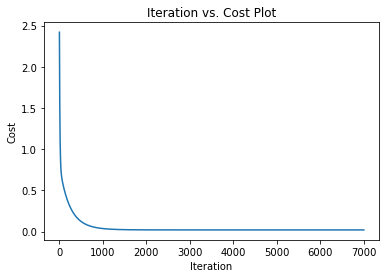

In [32]:
epochs = [i for i in range(1, 7001)]
plt.plot(epochs, costs, '-')
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.title("Iteration vs. Cost Plot")